In [1]:
import osmnx
%matplotlib inline
osmnx.config(log_file=True, log_console=True, use_cache=True)

In [2]:
place = 'Piedmont, California, USA'

## Get place shape geometries from OSM and save as shapefile

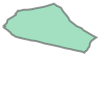

In [3]:
gdf = osmnx.gdf_from_place(place)
gdf.loc[0, 'geometry']

In [4]:
# save place boundary geometry as ESRI shapefile
osmnx.save_gdf_shapefile(gdf, filename='place-shape')

## Construct street network and save as shapefile to work with in GIS

In [5]:
G = osmnx.graph_from_place(place, network_type='drive')
G_projected = osmnx.project_graph(G)

In [6]:
# save street network as ESRI shapefile
osmnx.save_graph_shapefile(G_projected, filename='network-shape')

## Save street network as GraphML to work with in Gephi or NetworkX

In [7]:
# save street network as GraphML file
osmnx.save_graphml(G_projected, filename='network.graphml')

## Save street network as SVG to work with in Illustrator

In [8]:
# save street network as SVG
fig, ax = osmnx.plot_graph(G_projected, show=False, save=True, 
                           filename='network', file_format='svg')

## Load street network from saved GraphML file

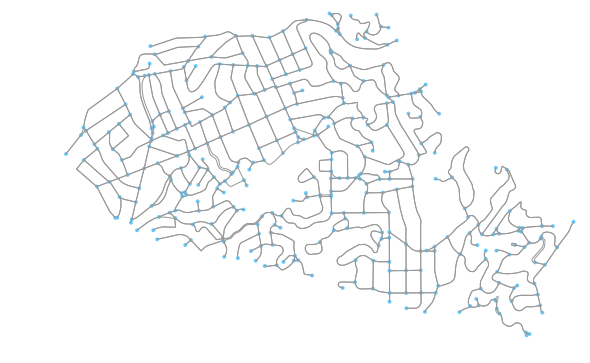

In [9]:
G2 = osmnx.load_graphml('network.graphml')
fig, ax = osmnx.plot_graph(G2)